In [1]:
# aqui eu vou só importar todas as libs que vou precisar
import numpy as np
from numpy.random import RandomState
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# aqui vai ser importante os dois scalers que irei precisar criar
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## toy problem

In [2]:
# mesmo probleminha do exercício anterior
# reproducibility
r = RandomState(seed=42)

# simulating data
n_points = 1000
n_outliers = 100
df = pd.DataFrame(
    np.vstack([
        2+r.randn(n_outliers,2)*4,
        r.randn(n_points,2)
    ]), columns=['x1', 'x2']
)
old_df = df.copy()
df.head()

x1        x2
0  3.986857  1.446943
1  4.590754  8.092119
2  1.063387  1.063452
3  8.316851  5.069739
4  0.122102  4.170240

In [4]:
# aqui eu vou criar o scaler 1
scaler_1 = StandardScaler()
# criando um df secundário (df_std) para não mexer no original
df_std = df.copy()
# criei um conjunto de dados para o desvio padrão e o fit é para treinar e o transform é para transformar
# fit_transform eu faço tudo de uma vez
df_std[:] = scaler_1.fit_transform(df)

# aqui eu vou criar o scaler 2
scaler_2 = MinMaxScaler()
# criando um df secundário (df_mm) para não mexer no original
df_mm = df.copy()
# criei um conjunto de dados para o min e max.
df_mm[:] = scaler_2.fit_transform(df)

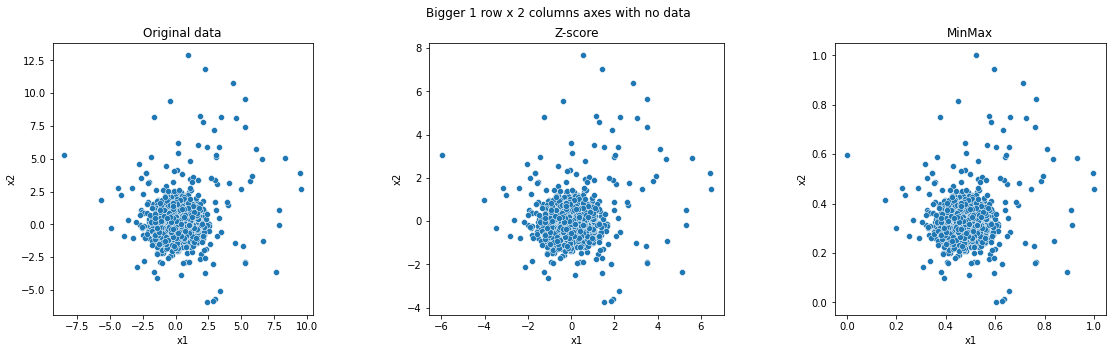

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')
sns.scatterplot(x='x1', y='x2', data=old_df, ax=axes[0])
axes[0].set_title('Original data')
axes[0].set_aspect(1)

sns.scatterplot(x='x1', y='x2', data=df_std, ax=axes[1])
axes[1].set_title('Z-score')
axes[1].set_aspect(1)

sns.scatterplot(x='x1', y='x2', data=df_mm, ax=axes[2])
axes[2].set_title('MinMax')
axes[2].set_aspect(1)
plt.show()